In [150]:
import cv2
from plantcv import plantcv as pcv

%matplotlib inline
from matplotlib import pyplot as plt

In [194]:
img = cv2.imread("plants/plant_6.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

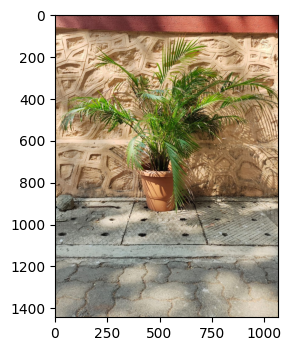

In [195]:
plt.imshow(img)
plt.show()

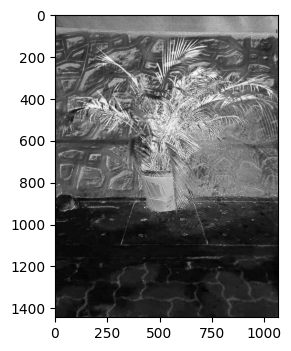

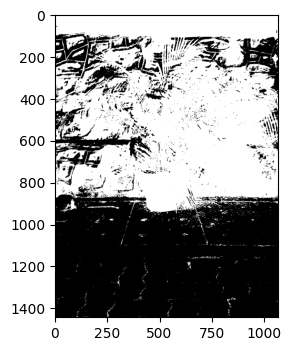

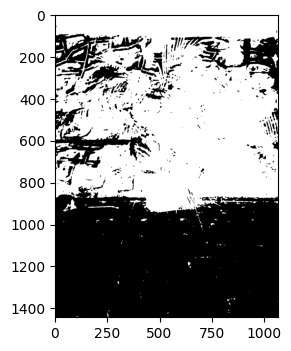

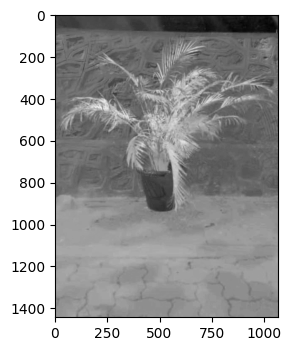

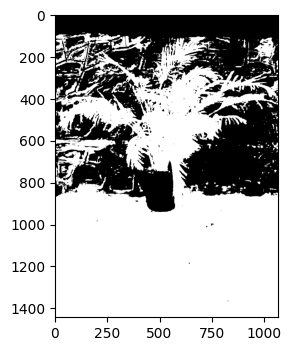

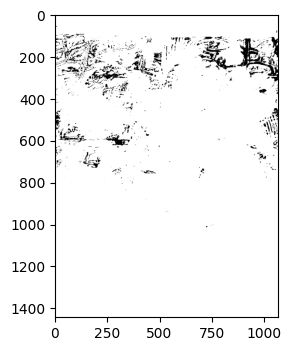

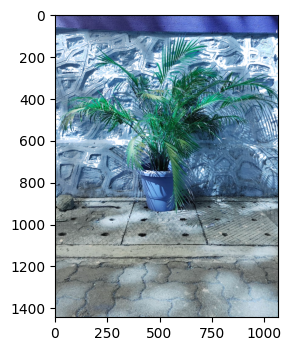

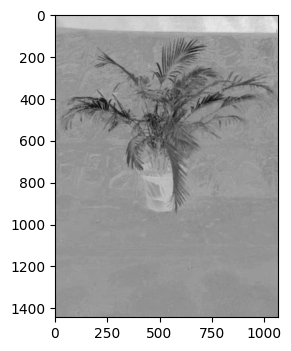

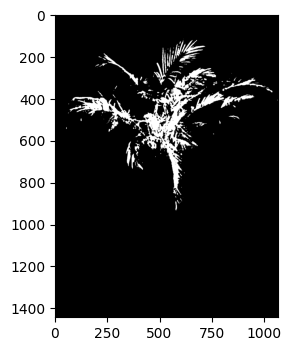

In [196]:
s1 = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
s_thresh1 = pcv.threshold.binary(gray_img=s1, threshold=75, object_type='light')
s_mblur1 = pcv.median_blur(gray_img=s_thresh1, ksize=5)
b1 = pcv.rgb2gray_lab(rgb_img=img, channel='b')
b_thresh1 = pcv.threshold.binary(gray_img=b1, threshold=110, object_type='light')
bs1 = pcv.logical_or(s_mblur1, b_thresh1)
masked1 = pcv.apply_mask(img=img, mask=bs1, mask_color='white')
masked1_a = pcv.rgb2gray_lab(rgb_img=masked1, channel='a')
mask = pcv.threshold.binary(gray_img=masked1_a, threshold=105, object_type='dark')

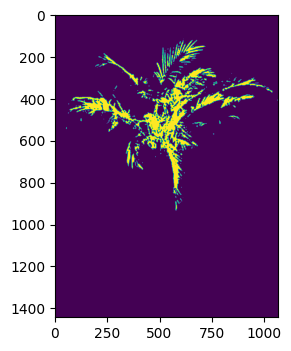

In [197]:
plt.imshow(mask)
plt.show()

### Size Analytics

In [198]:
pcv.params.debug = "plot"
# Optionally, set a sample label name
pcv.params.sample_label = "plant"

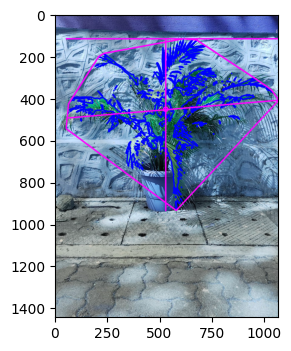

In [199]:
# Characterize object shapes
shape_image = pcv.analyze.size(img=img, labeled_mask=mask, n_labels=1)

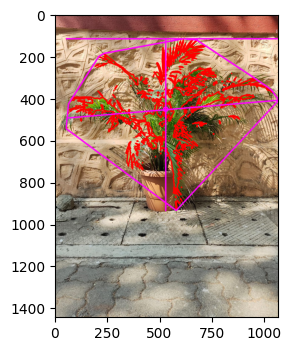

In [200]:
plt.imshow(shape_image)
plt.show()

In [201]:
pcv.print_image(shape_image, '/plant1_shape_img.png')

plant_obs = pcv.outputs.observations['plant_1']

In [202]:
plant_obs.keys()

dict_keys(['in_bounds', 'area', 'convex_hull_area', 'solidity', 'perimeter', 'width', 'height', 'longest_path', 'center_of_mass', 'convex_hull_vertices', 'object_in_frame', 'ellipse_center', 'ellipse_major_axis', 'ellipse_minor_axis', 'ellipse_angle', 'ellipse_eccentricity'])

In [203]:
plant_obs['height']

{'trait': 'height',
 'method': 'plantcv.plantcv.analyze.size',
 'scale': 'pixels',
 'datatype': "<class 'int'>",
 'value': 822,
 'label': 'pixels'}

In [204]:
plant_obs['area']['value']

87902.0

In [205]:
plant_obs['perimeter']['value']

70441.0046634674

# Storing the images

In [207]:
import os

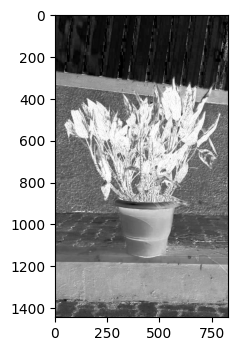

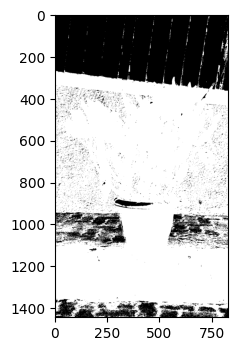

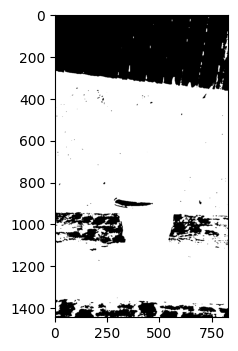

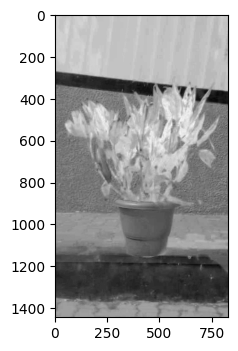

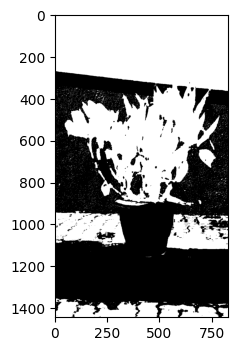

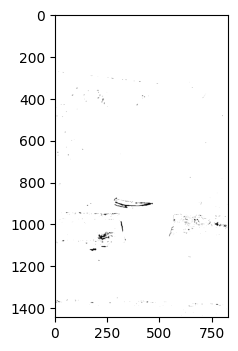

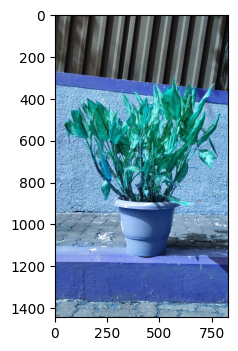

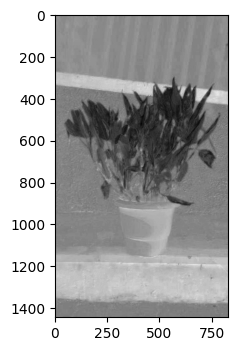

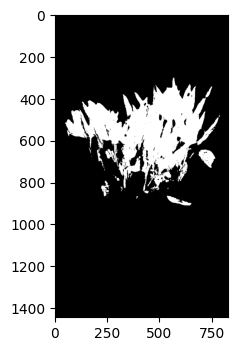

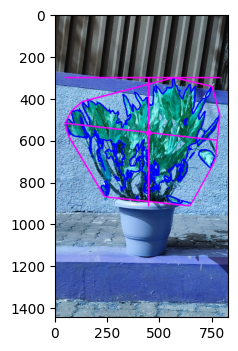

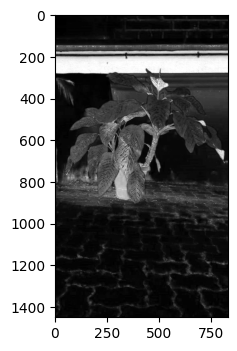

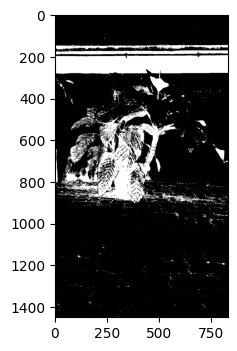

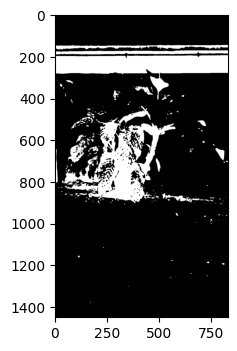

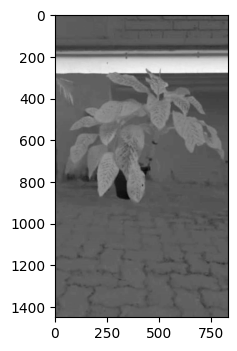

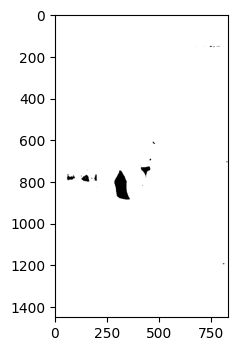

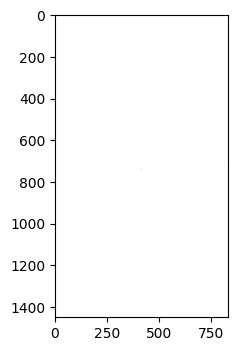

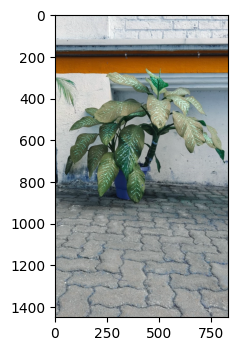

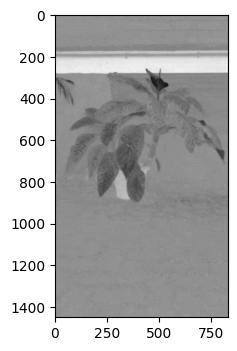

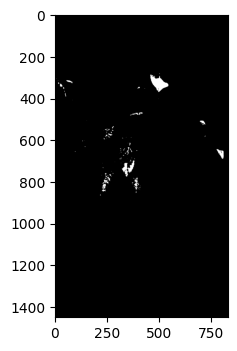

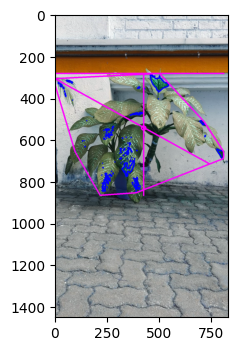

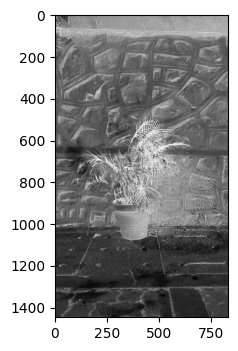

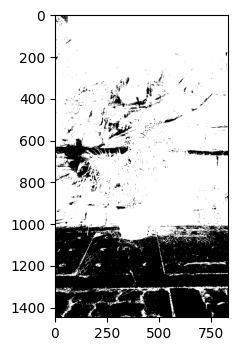

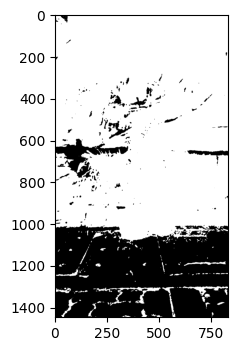

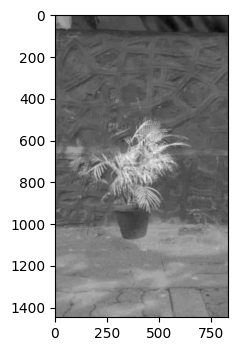

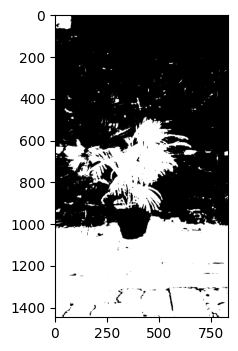

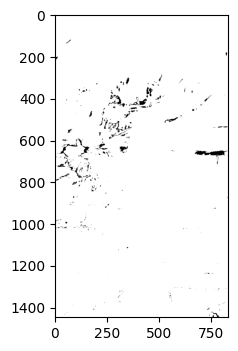

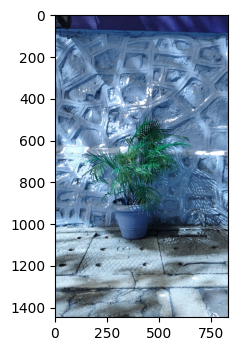

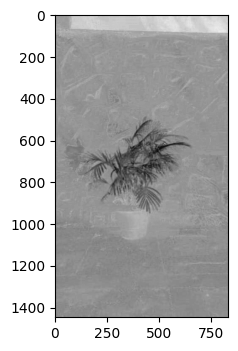

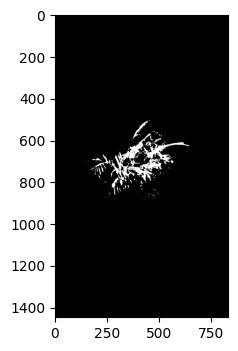

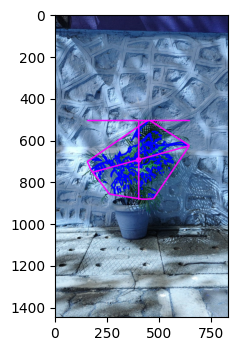

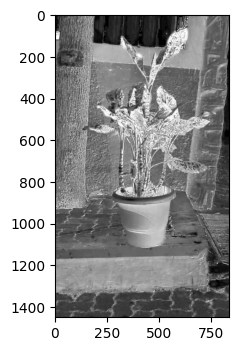

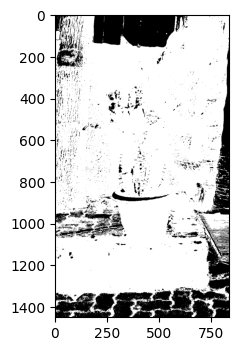

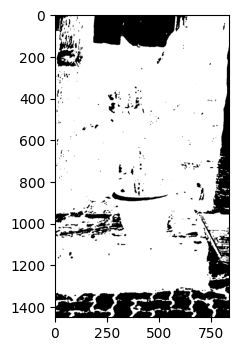

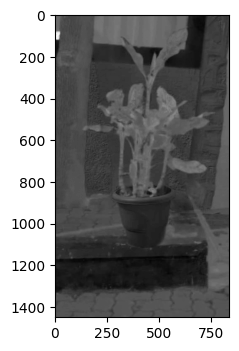

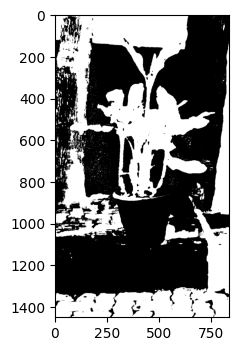

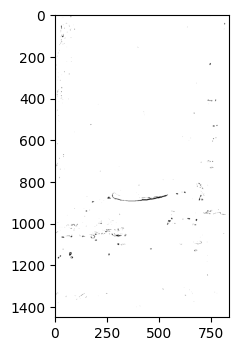

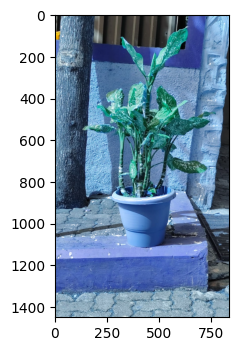

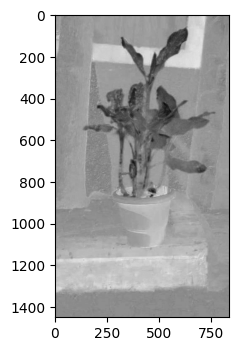

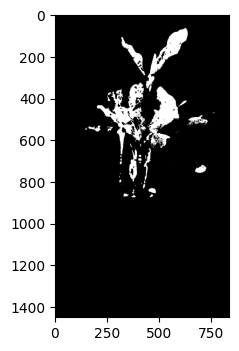

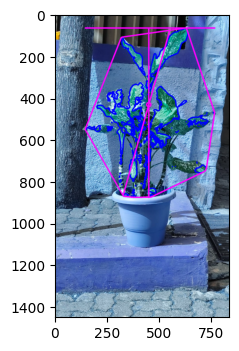

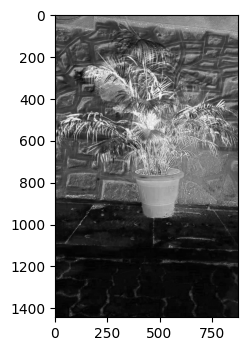

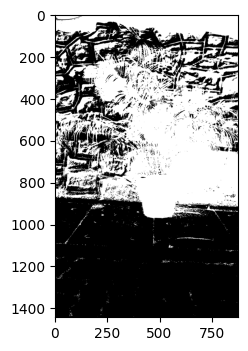

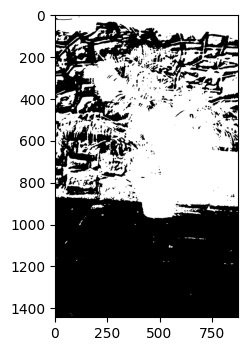

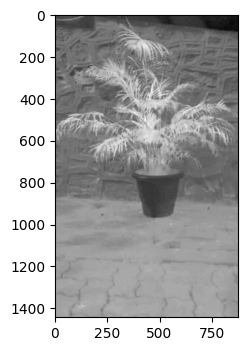

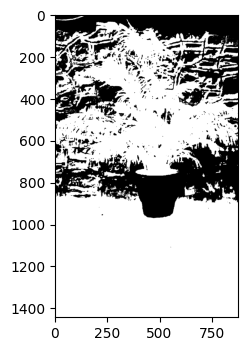

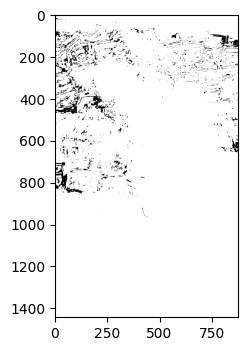

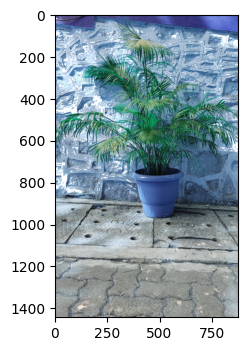

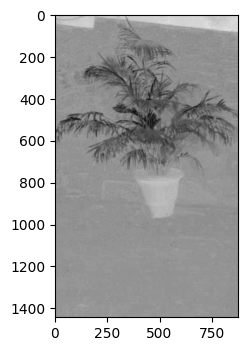

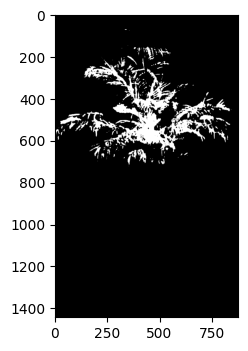

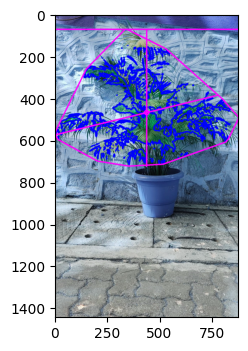

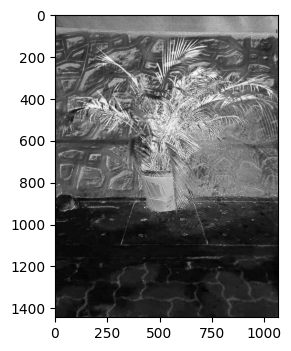

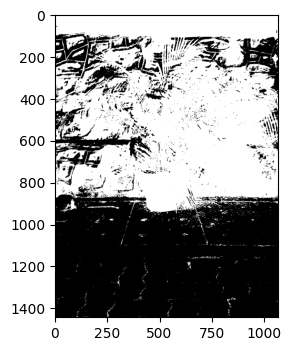

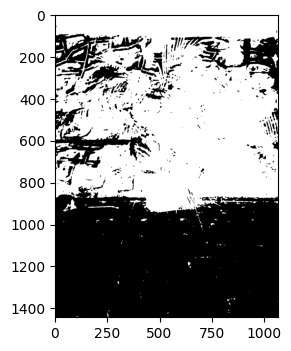

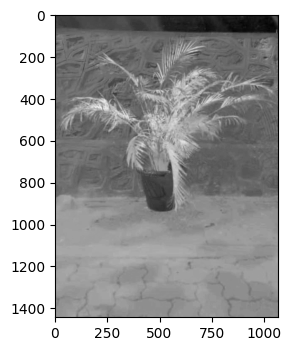

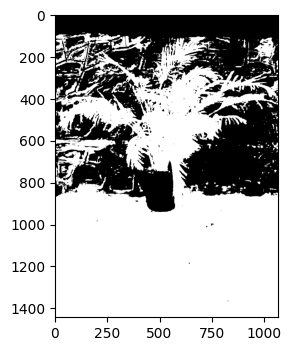

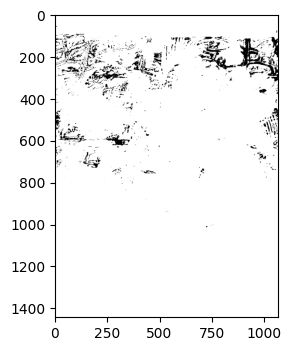

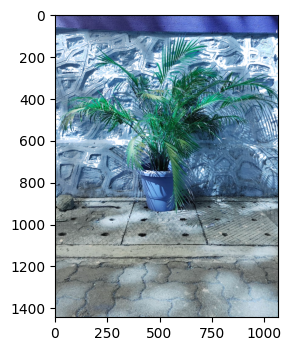

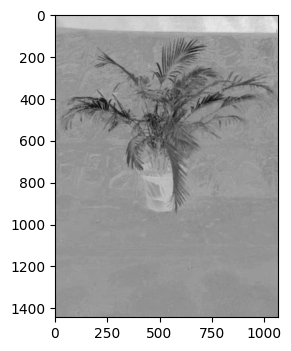

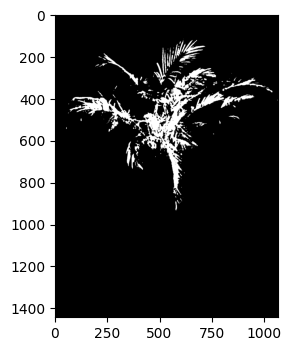

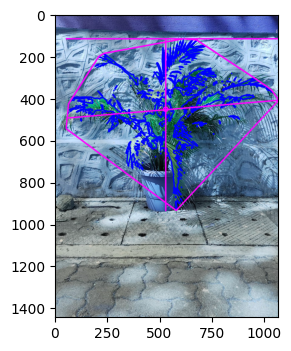

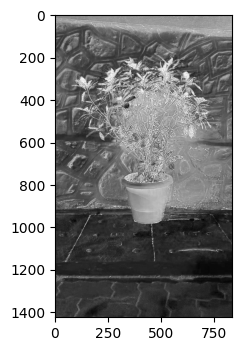

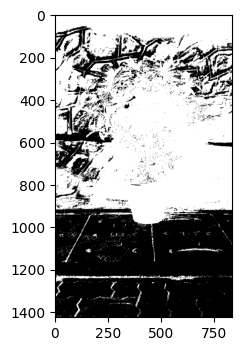

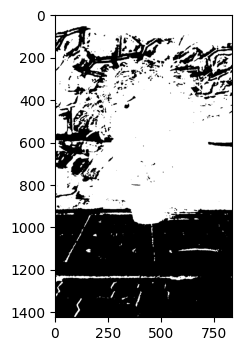

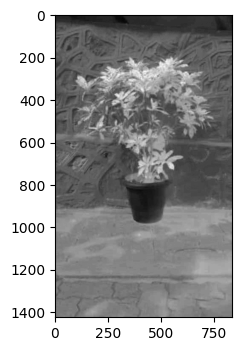

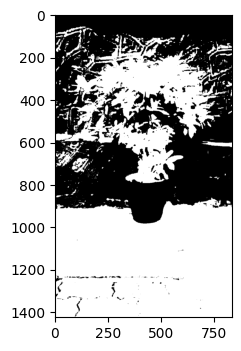

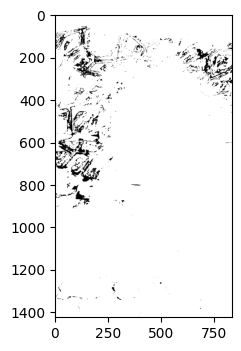

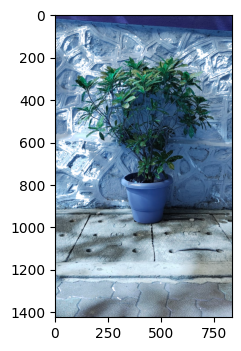

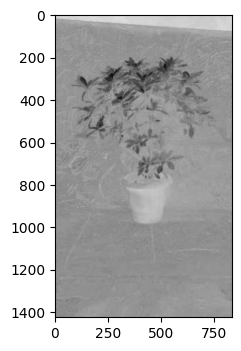

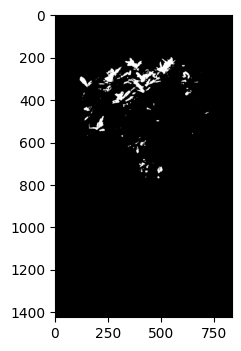

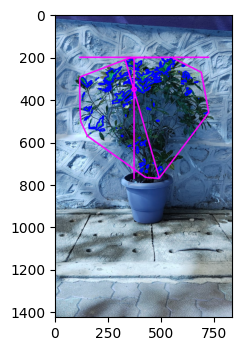

In [209]:
plants_folder = "plants"

# Iterate over each image in the folder
for filename in os.listdir(plants_folder):
    if filename.endswith(".jpeg"):
        # Read the image
        img_path = os.path.join(plants_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Perform image processing operations
        s1 = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
        s_thresh1 = pcv.threshold.binary(gray_img=s1, threshold=75, object_type='light')
        s_mblur1 = pcv.median_blur(gray_img=s_thresh1, ksize=5)
        b1 = pcv.rgb2gray_lab(rgb_img=img, channel='b')
        b_thresh1 = pcv.threshold.binary(gray_img=b1, threshold=110, object_type='light')
        bs1 = pcv.logical_or(s_mblur1, b_thresh1)
        masked1 = pcv.apply_mask(img=img, mask=bs1, mask_color='white')
        masked1_a = pcv.rgb2gray_lab(rgb_img=masked1, channel='a')
        mask = pcv.threshold.binary(gray_img=masked1_a, threshold=105, object_type='dark')

        # Save the mask image
        mask_folder = "masks"
        mask_path = os.path.join(mask_folder, "mask_" + filename)
        cv2.imwrite(mask_path, mask)

        # Analyze the size and save the shape image
        shape_image = pcv.analyze.size(img=img, labeled_mask=mask, n_labels=1)
        shape_image_folder = "shape_image"
        shape_image_path = os.path.join(shape_image_folder, "shape_image_" + filename)
        cv2.imwrite(shape_image_path, shape_image)